<a href="https://colab.research.google.com/github/JS555555/ANN-implementation/blob/implementing-ANN-using-numpy/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

### Data preprocessing

In [202]:
X, y = datasets.make_classification(n_samples=10000, n_features=5, n_informative=3, n_classes=4)

# Standardization
X_standarized = (X - X.mean())/X.std()


# Spliting data into test and train
N = X.shape[0]

X_train, y_train = X_standarized[:int(N*0.8)], y[:int(N*0.8)]
X_test, y_test = X_standarized[int(N*0.8):], y[int(N*0.8):]

# One-hot encoding targets
y_train_onehot = np.zeros((y_train.size, y_train.max() + 1))
y_train_onehot[np.arange(y_train.size), y_train] = 1
y_test_onehot = np.zeros((y_test.size, y_test.max() + 1))
y_test_onehot[np.arange(y_test.size), y_test] = 1

###Implementing ANN using numpy

In [212]:
def forward(X, W1, b1, W2, b2):
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    pY = expA / expA.sum(axis=1, keepdims=True)
    return pY, Z

In [213]:
def derivative_w2(Z, Y, pY):
    return Z.T.dot(pY - Y)

def derivative_b2(Y, pY):
    return (pY - Y).sum(axis=0)

def derivative_w1(X, Z, Y, pY, W2):
    return X.T.dot( ( ( pY-Y ).dot(W2.T) * (Z > 0) ) )

def derivative_b1(Z, Y, pY, W2):
    return (( pY-Y ).dot(W2.T) * (Z > 0)).sum(axis=0)

In [214]:
def classification_rate(Y, pY):
    return np.mean(Y == pY)

def cross_entropy(Y, pY):
    return -np.mean(Y * np.log(pY+10e-7))

In [215]:
iterations = 500
append_iterations = 50

learning_rate = 10e-8

N, D = X_train.shape
K = len(set(y))
M = 500 # number of hidden units

batch_size = 500
n_batches = N // batch_size

W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

cost_train = []
cost_test = []

classification_rate_train = []
classification_rate_test = []


mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0

# SGD
for i in range(iterations):
    for j in range(n_batches):
        Xbatch = X_train[j*batch_size:(j*batch_size + batch_size),]
        Ybatch = y_train_onehot[j*batch_size:(j*batch_size + batch_size),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # gradients
        gW2 = derivative_w2(Z, Ybatch, pYbatch)
        gb2 = derivative_b2(Ybatch, pYbatch)
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2)
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2)

        # update velocities
        dW2 = mu*dW2 - learning_rate*gW2
        db2 = mu*db2 - learning_rate*gb2
        dW1 = mu*dW1 - learning_rate*gW1
        db1 = mu*db1 - learning_rate*gb1

        # updates
        W2 += dW2
        b2 += db2
        W1 += dW1
        b1 += db1

        if j % append_iterations == 0:
            # train set
            pY, _ = forward(X_train, W1, b1, W2, b2)
            l = cross_entropy(pY, y_train_onehot)
            cost_train.append(l)

            e = classification_rate(np.argmax(pY, axis=1), y_train)
            classification_rate_train.append(e)

            # test set
            pY_test, _ = forward(X_test, W1, b1, W2, b2)
            l_test = cross_entropy(pY_test, y_test_onehot)
            cost_test.append(l_test)

            e_test = classification_rate(np.argmax(pY_test, axis=1), y_test)
            classification_rate_test.append(e_test)

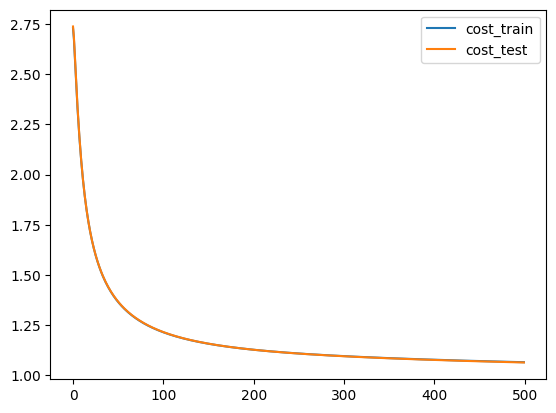

In [216]:
plt.plot(cost_train, label="cost_train")
plt.plot(cost_test, label="cost_test")
plt.legend();

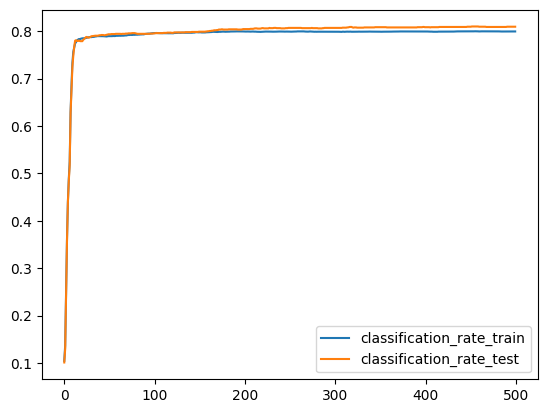

In [217]:
plt.plot(classification_rate_train, label="classification_rate_train")
plt.plot(classification_rate_test, label="classification_rate_test")
plt.legend();

###Implementing ANN using TensorFlow


True